In [0]:
%fs ls /FileStore/


path name size modificationTime dbfs:/FileStore/pubmed_baseline/ pubmed_baseline/ 0 1750500080279 dbfs:/FileStore/tables/ tables/ 0 1750458964463

In [0]:
%fs ls /FileStore/pubmed_baseline/


path name size modificationTime dbfs:/FileStore/pubmed_baseline/pubmed25n0001.xml.gz pubmed25n0001.xml.gz 19677806 1750500093775 dbfs:/FileStore/pubmed_baseline/pubmed25n0002.xml.gz pubmed25n0002.xml.gz 17774034 1750500096161 dbfs:/FileStore/pubmed_baseline/pubmed25n0003.xml.gz pubmed25n0003.xml.gz 16443024 1750500098427 dbfs:/FileStore/pubmed_baseline/pubmed25n0004.xml.gz pubmed25n0004.xml.gz 18118733 1750500101202 dbfs:/FileStore/pubmed_baseline/pubmed25n0005.xml.gz pubmed25n0005.xml.gz 17416603 1750500103596 dbfs:/FileStore/pubmed_baseline/pubmed25n0006.xml.gz pubmed25n0006.xml.gz 20449707 1750500106166 dbfs:/FileStore/pubmed_baseline/pubmed25n0007.xml.gz pubmed25n0007.xml.gz 20547744 1750500108677 dbfs:/FileStore/pubmed_baseline/pubmed25n0008.xml.gz pubmed25n0008.xml.gz 19652303 1750500111118 dbfs:/FileStore/pubmed_baseline/pubmed25n0009.xml.gz pubmed25n0009.xml.gz 9147705 1750500113149 dbfs:/FileStore/pubmed_baseline/pubmed25n0010.xml.gz pubmed25n0010.xml.gz 12458196 1750500115356 dbfs:/FileStore/pubmed_baseline/pubmed25n0011.xml.gz pubmed25n0011.xml.gz 17390351 1750500117792 dbfs:/FileStore/pubmed_baseline/pubmed25n0012.xml.gz pubmed25n0012.xml.gz 16094710 1750500120177 dbfs:/FileStore/pubmed_baseline/pubmed25n0013.xml.gz pubmed25n0013.xml.gz 16169317 1750500093580 dbfs:/FileStore/pubmed_baseline/pubmed25n0014.xml.gz pubmed25n0014.xml.gz 16734156 1750500096407 dbfs:/FileStore/pubmed_baseline/pubmed25n0015.xml.gz pubmed25n0015.xml.gz 14435261 1750500098713 dbfs:/FileStore/pubmed_baseline/pubmed25n0016.xml.gz pubmed25n0016.xml.gz 14651353 1750500100900 dbfs:/FileStore/pubmed_baseline/pubmed25n0017.xml.gz pubmed25n0017.xml.gz 14028022 1750500103105 dbfs:/FileStore/pubmed_baseline/pubmed25n0018.xml.gz pubmed25n0018.xml.gz 13220801 1750500105396 dbfs:/FileStore/pubmed_baseline/pubmed25n0019.xml.gz pubmed25n0019.xml.gz 16123551 1750500107951 dbfs:/FileStore/pubmed_baseline/pubmed25n0020.xml.gz pubmed25n0020.xml.gz 12570422 1750500110202 dbfs:/FileStore/pubmed_baseline/pubmed25n0021.xml.gz pubmed25n0021.xml.gz 13293658 1750500112401 dbfs:/FileStore/pubmed_baseline/pubmed25n0022.xml.gz pubmed25n0022.xml.gz 13779151 1750500115360 dbfs:/FileStore/pubmed_baseline/pubmed25n0023.xml.gz pubmed25n0023.xml.gz 13547802 1750500117621 dbfs:/FileStore/pubmed_baseline/pubmed25n0024.xml.gz pubmed25n0024.xml.gz 13603941 1750500119857 dbfs:/FileStore/pubmed_baseline/pubmed25n0025.xml.gz pubmed25n0025.xml.gz 13264247 1750500093604 dbfs:/FileStore/pubmed_baseline/pubmed25n0026.xml.gz pubmed25n0026.xml.gz 15777296 1750500096427 dbfs:/FileStore/pubmed_baseline/pubmed25n0027.xml.gz pubmed25n0027.xml.gz 18192708 1750500098768 dbfs:/FileStore/pubmed_baseline/pubmed25n0028.xml.gz pubmed25n0028.xml.gz 14784063 1750500101155 dbfs:/FileStore/pubmed_baseline/pubmed25n0029.xml.gz pubmed25n0029.xml.gz 14160484 1750500103483 dbfs:/FileStore/pubmed_baseline/pubmed25n0030.xml.gz pubmed25n0030.xml.gz 13371851 1750500105879 dbfs:/FileStore/pubmed_baseline/pubmed25n0031.xml.gz pubmed25n0031.xml.gz 14324458 1750500108099 dbfs:/FileStore/pubmed_baseline/pubmed25n0032.xml.gz pubmed25n0032.xml.gz 14078304 1750500110784 dbfs:/FileStore/pubmed_baseline/pubmed25n0033.xml.gz pubmed25n0033.xml.gz 14381754 1750500113116 dbfs:/FileStore/pubmed_baseline/pubmed25n0034.xml.gz pubmed25n0034.xml.gz 11149772 1750500115374 dbfs:/FileStore/pubmed_baseline/pubmed25n0035.xml.gz pubmed25n0035.xml.gz 10047172 1750500117667 dbfs:/FileStore/pubmed_baseline/pubmed25n0036.xml.gz pubmed25n0036.xml.gz 15665398 1750500120046 dbfs:/FileStore/pubmed_baseline/pubmed25n0037.xml.gz pubmed25n0037.xml.gz 14791926 1750500093544 dbfs:/FileStore/pubmed_baseline/pubmed25n0038.xml.gz pubmed25n0038.xml.gz 14066398 1750500096014 dbfs:/FileStore/pubmed_baseline/pubmed25n0039.xml.gz pubmed25n0039.xml.gz 14894198 1750500098411 dbfs:/FileStore/pubmed_baseline/pubmed25n0040.xml.gz pubmed25n0040.xml.gz 13076028 1750500100625 dbfs:/FileStore/pubmed_baseline/pubmed25n0041.xml.gz pubmed25n0041.xml.gz 13496617 175050

In [0]:
from pyspark.sql.functions import input_file_name


files = dbutils.fs.ls("dbfs:/FileStore/pubmed_filtrado")

num_files = len(files)
total_size = sum(f.size for f in files)

print(f"Número de ficheros: {num_files}")
print(f"Tamaño total: {total_size/1024/1024:.2f} MB")

Número de ficheros: 1154
Tamaño total: 45286.53 MB


## Filtrage de la muestra 2020- **2025**

In [0]:


from pyspark.sql.functions import col, substr
df = spark.read.parquet("/FileStore/pubmed_parsed_fast")
df.printSchema()

df_filtrado = df.filter(
    (col("year").isNotNull()) &
    (col("year").substr(1, 4) >= "2020") &
     (col("year").substr(1, 4) <= "2025")
)


# Mostrar una muestra opcional
display(df_filtrado)

# Guardar en parquet
df_filtrado.write.mode("overwrite").parquet("/FileStore/pubmed_filtrado_2020_2025")
print(df_filtrado.count())

root
 |-- pmid: string (nullable = true)
 |-- title: string (nullable = true)
 |-- year: string (nullable = true)
 |-- journal: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- issn: string (nullable = true)
 |-- language: string (nullable = true)
 |-- country: string (nullable = true)
 |-- mesh_terms: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- citation: string (nullable = true)
 |-- mid: string (nullable = true)
 |-- authors: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- fullname: string (nullable = true)
 |    |    |-- orcid: string (nullable = true)
 |    |    |-- aff: string (nullable = true)
 |    |    |-- affiliation_country: string (nullable = true)
 |-- doi: string (nullable = true)
 |-- pii: string (nullable = true)
 |-- pmc: string (nullable = true)



pmid title year journal volume issn language country mesh_terms citation mid authors doi pii pmc 27364091 Editorial Comment for Zhong et al. 2021 Journal of endourology 35 1557-900X eng United States List() J Endourol, 35, 2021 List(List(Mehmet Ilker Gökce, , Department of Urology, Ankara University School of Medicine, Ankara, Turkey., )) 10.1089/end.2016.0355 27378506 The Poet׳s Obligation (The Problem of a "Calling"). 2020 Current problems in pediatric and adolescent health care 50 1538-3199 eng United States List(Career Choice::Major, Humans::Minor, Medicine::Major, Poetry as Topic::Minor) Curr Probl Pediatr Adolesc Health Care, 50, 2020 List(List(Pamela A Mazzeo, , , Spain)) 10.1016/j.cppeds.2016.06.002 S1538-5442(16)30037-2 27381878 Migration of a foreign object to the parapharyngeal space: an unusual factitious disorder. 2020 Mar - Apr Brazilian journal of otorhinolaryngology 86 1808-8686 eng Brazil List(Adolescent::Minor, Female::Minor, Foreign-Body Migration::Minor, Humans::Minor, Parapharyngeal Space::Minor) Braz J Otorhinolaryngol, 86, 2020 Mar - Apr List(List(Senol Comoglu, , Istanbul University, Istanbul Faculty of Medicine, Department of Otorhinolaryngology and Head & Neck Surgery, Istanbul, Turkey., ), List(Necati Enver, , Istanbul University, Istanbul Faculty of Medicine, Department of Otorhinolaryngology and Head & Neck Surgery, Istanbul, Turkey., ), List(Comert Sen, , Istanbul University, Istanbul Faculty of Medicine, Department of Otorhinolaryngology and Head & Neck Surgery, Istanbul, Turkey. Electronic address: sencomert@gmail.com., ), List(Levent Aydemir, , Istanbul University, Istanbul Faculty of Medicine, Department of Otorhinolaryngology and Head & Neck Surgery, Istanbul, Turkey., )) 10.1016/j.bjorl.2016.05.004 S1808-8694(16)30108-2 PMC9422471 27381879 Prostatic carcinoma metastatic to frontal and cavernous sinuses: a case report. 2020 May - Jun Brazilian journal of otorhinolaryngology 86 1808-8686 eng Brazil List(Aged::Minor, Cavernous Sinus::Minor, Hemangioma, Cavernous::Minor, Humans::Minor, Male::Minor, Paranasal Sinus Neoplasms::Minor, Prostatic Neoplasms::Minor) Braz J Otorhinolaryngol, 86, 2020 May - Jun List(List(Jérôme Rene Lechien, , EpiCURA Hospital, RHMS Baudour, Department of Otolaryngology and Head and Neck Surgery, Baudour, Belgium; University of Mons (UMONS), Faculty of Psychology, Research Institute for Language Sciences and Technology, Mons, Belgium; University of Mons (UMONS), Faculty of Medicine, Research Institute for Health Sciences and Technology, Laboratory of Anatomy and Cell Biology, Mons, Belgium. Electronic address: Jerome.lechien@umons.ac.be., ), List(Jacques Doyen, , EpiCURA Hospital, RHMS Baudour, Department of Radiology, Baudour, Belgium., ), List(Mohamad Khalife, , EpiCURA Hospital, RHMS Baudour, Department of Otolaryngology and Head and Neck Surgery, Baudour, Belgium; University of Mons (UMONS), Faculty of Medicine, Research Institute for Health Sciences and Technology, Laboratory of Anatomy and Cell Biology, Mons, Belgium., ), List(Sven Saussez, , EpiCURA Hospital, RHMS Baudour, Department of Otolaryngology and Head and Neck Surgery, Baudour, Belgium; University of Mons (UMONS), Faculty of Medicine, Research Institute for Health Sciences and Technology, Laboratory of Anatomy and Cell Biology, Mons, Belgium., )) 10.1016/j.bjorl.2016.05.005 S1808-8694(16)30109-4 PMC9422636 27388954 Vertebral artery trauma in a stab wound to the ear: case report. 2020 May - Jun Brazilian journal of otorhinolaryngology 86 1808-8686 eng Brazil List(Adult::Minor, Ear::Minor, Ear, External::Minor, Humans::Minor, Male::Minor, Neck Injuries::Minor, Vertebral Artery::Minor, Wounds, Stab::Minor) Braz J Otorhinolaryngol, 86, 2020 May - Jun List(List(Sha Jichao, , China-Japan Union Hospital of Jilin University, Department of Otorhinolaryngology Head and Neck Surgery, Changchun, China., China), List(Meng Cuida, , China-Japan Union Hospital of Jilin University, Department of Otorhinolaryngology Head a

7769021


In [0]:
spark.read.parquet("/FileStore/pubmed_filtrado_2020_2025").createOrReplaceTempView("pubmed_temp_filtrado")


In [0]:
%sql

select pmid, count(1) from pubmed_temp_filtrado
group by pmid
having count(1) >1;

select * from pubmed_temp_filtrado where pmid = 33708380;

pmid title year journal volume issn language country mesh_terms citation mid authors doi pii pmc 33708380 Minimally invasive (flapless) crown lengthening by erbium:YAG laser in aesthetic zone. 2020 F1000Research 9 2046-1402 eng England List(Crown Lengthening::Minor, Erbium::Minor, Esthetics::Minor, Lasers, Solid-State::Major, Yttrium::Minor) F1000Res, 9, 2020 List(List(Saverio Capodiferro, 0000-0002-9819-6229, Interdisciplinary Department of Medicine, University of Bari, Bari, Italy., Italy), List(Angela Tempesta, , Interdisciplinary Department of Medicine, University of Bari, Bari, Italy., Italy), List(Luisa Limongelli, , Interdisciplinary Department of Medicine, University of Bari, Bari, Italy., Italy), List(Giuseppe Barile, , Interdisciplinary Department of Medicine, University of Bari, Bari, Italy., Italy), List(Daniela Di Venere, , Interdisciplinary Department of Medicine, University of Bari, Bari, Italy., Italy), List(Massimo Corsalini, 0000-0002-0521-1363, Interdisciplinary Department of Medicine, University of Bari, Bari, Italy., Italy)) 10.12688/f1000research.26008.1 PMC7927205 33708380 Minimally invasive (flapless) crown lengthening by erbium:YAG laser in aesthetic zone. 2020 F1000Research 9 2046-1402 eng England List(Crown Lengthening::Minor, Erbium::Minor, Esthetics::Minor, Lasers, Solid-State::Major, Yttrium::Minor) F1000Res, 9, 2020 List(List(Saverio Capodiferro, 0000-0002-9819-6229, Interdisciplinary Department of Medicine, University of Bari, Bari, Italy., Italy), List(Angela Tempesta, , Interdisciplinary Department of Medicine, University of Bari, Bari, Italy., Italy), List(Luisa Limongelli, , Interdisciplinary Department of Medicine, University of Bari, Bari, Italy., Italy), List(Giuseppe Barile, , Interdisciplinary Department of Medicine, University of Bari, Bari, Italy., Italy), List(Daniela Di Venere, , Interdisciplinary Department of Medicine, University of Bari, Bari, Italy., Italy), List(Massimo Corsalini, 0000-0002-0521-1363, Interdisciplinary Department of Medicine, University of Bari, Bari, Italy., Italy)) 10.12688/f1000research.26008.2 PMC7927205.2 33708380 Minimally invasive (flapless) crown lengthening by erbium:YAG laser in aesthetic zone. 2020 F1000Research 9 2046-1402 eng England List(Crown Lengthening::Minor, Erbium::Minor, Esthetics::Minor, Lasers, Solid-State::Major, Yttrium::Minor) F1000Res, 9, 2020 List(List(Saverio Capodiferro, 0000-0002-9819-6229, Interdisciplinary Department of Medicine, University of Bari, Bari, Italy., Italy), List(Angela Tempesta, , Interdisciplinary Department of Medicine, University of Bari, Bari, Italy., Italy), List(Luisa Limongelli, , Interdisciplinary Department of Medicine, University of Bari, Bari, Italy., Italy), List(Giuseppe Barile, , Interdisciplinary Department of Medicine, University of Bari, Bari, Italy., Italy), List(Daniela Di Venere, , Interdisciplinary Department of Medicine, University of Bari, Bari, Italy., Italy), List(Massimo Corsalini, 0000-0002-0521-1363, Interdisciplinary Department of Medicine, University of Bari, Bari, Italy., Italy)) 10.12688/f1000research.26008.3 PMC7927205.3

## EDA

In [0]:
from pyspark.sql.functions import col, explode
from pyspark.sql.types import ArrayType, StringType,StructType, StructField, StringType, IntegerType


# Límite de valores únicos a mostrar por columna
max_values = 20

##df = spark.read.parquet("/FileStore/pubmed_parsed_fast")
df = spark.read.parquet("/FileStore/pubmed_filtrado_2020_2025")

df.show(5, truncate=False)

# Contar total de filas del DataFrame
total_rows = df.count()
print(f"\n📊 Total de registros (filas): {total_rows}")

# Lista de resultados
summary_data = []


df.printSchema()

for field in df.schema.fields:
    col_name = field.name
    col_type = field.dataType

    print(f"\n🔍 Columna: {col_name} - Tipo: {col_type}")

    if isinstance(col_type, ArrayType):
        element_type = col_type.elementType

        # Explota el array en elementos individuales
        exploded_df = df.select(explode(col(col_name)).alias("element"))

        if isinstance(element_type, StringType):
            # Array de strings
            count_unique = exploded_df.select("element").distinct().count()
            count_non_null = exploded_df.filter((col("element").isNotNull()) & (col("element") != "")).count()
            count_null = exploded_df.filter((col("element").isNull()) | (col("element") == "")).count()
            count_duplicates = count_non_null - count_unique

            print(f"🔸 Total únicos: {count_unique}")
            print(f"🔸 Total no nulos/no vacíos: {count_non_null}")
            print(f"🔸 Total duplicados: {count_duplicates}")
            print(f"🔸 Total nulos o vacíos: {count_null}")

            exploded_df.select("element").distinct().limit(max_values).show(truncate=False)

        elif isinstance(element_type, StructType):
            # Array de structs (ej. fullname, orcid, aff)
            # Suponemos que tiene al menos un campo llamado fullname
            count_unique = exploded_df.select("element.fullname").distinct().count()
            count_non_null = exploded_df.filter(col("element.fullname").isNotNull() & (col("element.fullname") != "")).count()
            count_null = exploded_df.filter(col("element.fullname").isNull() | (col("element.fullname") == "")).count()
            count_duplicates = count_non_null - count_unique

            print(f"🧩 Total únicos (fullname): {count_unique}")
            print(f"🧩 Total no nulos (fullname): {count_non_null}")
            print(f"🧩 Total duplicados (fullname): {count_duplicates}")
            print(f"🧩 Total nulos (fullname): {count_null}")

            exploded_df.select("element.fullname", "element.orcid", "element.aff").distinct().limit(max_values).show(truncate=False)

        else:
            print(f"⚠️ Tipo de elemento en array no manejado: {element_type}")
            continue

        summary_data.append((
            col_name,
            str(col_type),
            total_rows,
            count_unique,
            count_non_null,
            count_duplicates,
            count_null
        ))

    else:
        # Columna normal (string, int, etc.)
        count_unique = df.select(col(col_name)).distinct().count()

        if isinstance(col_type, StringType):
            count_non_null = df.filter((col(col_name).isNotNull()) & (col(col_name) != "")).count()
            count_null = df.filter((col(col_name).isNull()) | (col(col_name) == "")).count()
        else:
            count_non_null = df.filter(col(col_name).isNotNull()).count()
            count_null = df.filter(col(col_name).isNull()).count()

        count_duplicates = count_non_null - count_unique

        print(f"📊 Total únicos: {count_unique}")
        print(f"📊 Total no nulos/no vacíos: {count_non_null}")
        print(f"📊 Total duplicados: {count_duplicates}")
        print(f"📊 Total null: {count_null}")

        df.select(col(col_name)).distinct().limit(max_values).show(truncate=False)

        summary_data.append((
            col_name,
            str(col_type),
            total_rows,
            count_unique,
            count_non_null,
            count_duplicates,
            count_null
        ))

# Crear DataFrame resumen
summary_df = spark.createDataFrame(
    summary_data,
    ["column_name", "type", "total_records", "unique_count", "non_null_count", "duplicate_count","total_nulos" ]
)

# Mostrar resultado ordenado por número de duplicados
summary_df.orderBy("duplicate_count", ascending=False).show(n=summary_df.count(), truncate=False, vertical=True)

#summary_pd = summary_df.orderBy("duplicate_count", ascending=False).toPandas()
#print(summary_pd)

+--------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----+--------+------+---------+--------+-------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------+---+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [0]:
 # Títulos más largos
# Outliers: artículos con muchos autores
print("\n🚨 Artículos con número inusualmente alto de autores (outliers):")
from pyspark.sql.functions import size, col

df_with_author_count = df.withColumn("num_authors", size(col("authors")))

 df_many_authors = df_with_author_count.filter(col("num_authors") > 50)
# Cuenta cuántos hay
print("Número de artículos con más de 50 autores:", df_many_authors.count())

# Opcional: muestra algunos
df_many_authors.select("pmid", "num_authors").show(10, truncate=False)


🚨 Artículos con número inusualmente alto de autores (outliers):
Número de artículos con más de 50 autores: 7763
+--------+-----------+
|pmid    |num_authors|
+--------+-----------+
|38640399|618        |
|38641645|109        |
|38642762|52         |
|38644692|77         |
|38645094|97         |
|38645679|87         |
|38650359|65         |
|38652067|56         |
|38652555|64         |
|38652672|67         |
+--------+-----------+
only showing top 10 rows


In [0]:
%pip install python-docx

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
%pip install python-docx

In [0]:
dbutils.library.restartPython()

In [0]:
display (summary_df)

column_name type total_records unique_count non_null_count duplicate_count total_nulos pmid StringType() 7769021 7767128 7769021 1893 0 title StringType() 7769021 7595567 7712003 116436 57018 year StringType() 7769021 600 7769021 7768421 0 journal StringType() 7769021 15284 7769021 7753737 0 volume StringType() 7769021 4907 7531851 7526944 237170 issn StringType() 7769021 14959 7761578 7746619 7443 language StringType() 7769021 33 7769021 7768988 0 country StringType() 7769021 102 7768675 7768573 346 mesh_terms ArrayType(StringType(), True) 7769021 57426 45091067 45033641 0 citation StringType() 7769021 120827 7769021 7648194 0 mid StringType() 7769021 246827 246826 -1 7522195 authors ArrayType(StructType([StructField('fullname', StringType(), True), StructField('orcid', StringType(), True), StructField('aff', StringType(), True), StructField('affiliation_country', StringType(), True)]), True) 7769021 9709415 50134568 40425153 0 doi StringType() 7769021 7518737 7674218 155481 94803 pii StringType() 7769021 5057990 5173670 115680 2595351 pmc StringType() 7769021 4086517 4087576 1059 3681445

In [0]:
%pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/250.9 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 8.1 MB/s eta 0:00:00
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
dbutils.library.restartPython()

In [0]:
summary_pd = summary_df.orderBy("duplicate_count", ascending=False).toPandas()


import pandas as pd
import shutil
import os


local_path = "/tmp/summary_report.xlsx"
dbfs_dir = "/dbfs/FileStore"
dbfs_path = f"{dbfs_dir}/summary_report.xlsx"

# Crear la carpeta si no existe
os.makedirs(dbfs_dir, exist_ok=True)

# Asumiendo summary_pd ya está creado
local_path = "/tmp/summary_report.xlsx"
summary_pd.to_excel(local_path, index=False, engine='openpyxl')

os.makedirs("/dbfs/FileStore", exist_ok=True)
dbfs_path = "/dbfs/FileStore/summary_report.xlsx"
shutil.copy(local_path, dbfs_path)

print(f"Archivo guardado en DBFS: {dbfs_path}")



#https://3132215626649366.6.gcp.databricks.com/files/summary_report.xlsx

Archivo guardado en DBFS: /dbfs/FileStore/summary_report.xlsx


In [0]:
from pyspark.sql.functions import col, explode, trim, lower, countDistinct

# Explota el array de autores
exploded_authors = df.select(
    col("pmid"), explode(col("authors")).alias("author")
)

# Limpia afiliación (puede haber nulos, mayúsculas, espacios)
exploded_authors = exploded_authors.withColumn(
    "affiliation_clean",
    trim(lower(col("author.aff")))
)

# Cuenta afiliaciones únicas por pmid (o tu ID)
affiliations_per_article = exploded_authors.groupBy("pmid").agg(
    countDistinct("affiliation_clean").alias("num_affiliations")
)

# Une de nuevo al dataframe principal
df_enriched = df.join(affiliations_per_article, on="pmid", how="left")


df_enriched.show(10)

+--------+--------------------+----+--------------------+------+---------+--------+-------------+--------------------+--------------------+---+--------------------+--------------------+--------------------+---+----------------+
|    pmid|               title|year|             journal|volume|     issn|language|      country|          mesh_terms|            citation|mid|             authors|                 doi|                 pii|pmc|num_affiliations|
+--------+--------------------+----+--------------------+------+---------+--------+-------------+--------------------+--------------------+---+--------------------+--------------------+--------------------+---+----------------+
|16802116|RETRACTED ARTICLE...|2023|  Plant cell reports|    42|1432-203X|     eng|      Germany|                  []|Plant Cell Rep, 4...|   |[{G Franklin, , D...|10.1007/s00299-00...|10.1007/s00299-00...|   |               2|
|27167592|Standard and immu...|2020|  Minerva pediatrica|    72|1827-1715|     eng|     

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
Matriz de correlación:
                   num_authors  title_word_count  num_affiliations  year_int
num_authors          1.000000          0.113620          0.723361  0.025921
title_word_count     0.113620          1.000000          0.124019  0.035569
num_affiliations     0.723361          0.124019          1.000000  0.019369
year_int             0.025921          0.035569          0.019369  1.000000


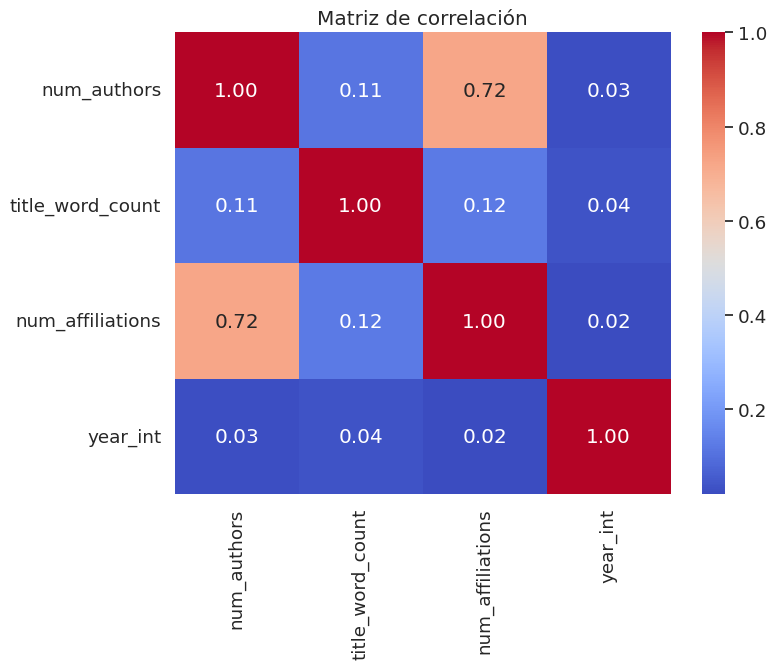

✅ Archivo disponible: /dbfs/FileStore/corr_matrix.xlsx


In [0]:
# 1️⃣ Instalar dependencias (solo una vez)
%pip install openpyxl seaborn

# 2️⃣ Imports
from pyspark.sql.functions import col, size, split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
import os

# 3️⃣ Crear columnas numéricas representativas
df_corr = (
    df_enriched.withColumn("num_authors", size(col("authors")))
      .withColumn("title_word_count", size(split(col("title"), " ")))
      .withColumn("year_int", col("year").cast("int"))
      .withColumn("num_affiliations", col("num_affiliations").cast("int"))
)



# Opcional: Si tienes 'affiliations' como array
##if "affiliations" in df.columns:
##    df_corr = df_corr.withColumn("num_affiliations", size(col("affiliations")))
##else:
##    df_corr = df_corr.withColumn("num_affiliations", col("num_authors"))  # Ejemplo placeholder

# 4️⃣ Pasar a Pandas (usa muestra si es grande)
df_corr_pd = df_corr.select(
    "num_authors", "title_word_count", "num_affiliations", "year_int"
).dropna().limit(50000).toPandas()

# 5️⃣ Matriz de correlación
corr_matrix = df_corr_pd.corr()
print("Matriz de correlación:\n", corr_matrix)

# 6️⃣ Visualizar con mapa de calor
sns.set(font_scale=1.2)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# 7️⃣ Guardar matriz en Excel
local_xlsx = "/tmp/corr_matrix.xlsx"
corr_matrix.to_excel(local_xlsx, engine="openpyxl")

# Copiar a DBFS para descargar
os.makedirs("/dbfs/FileStore", exist_ok=True)
dbfs_xlsx = "/dbfs/FileStore/corr_matrix.xlsx"
shutil.copy(local_xlsx, dbfs_xlsx)

print(f"✅ Archivo disponible: {dbfs_xlsx}")


In [0]:
%pip install matplotlib seaborn pandas